# ANNUAL TEMPERATURE FORECAST DENPASAR BALI INDONESIA*

**TIM BMKG_5**

**1. AJENG KANIA WIDIASTUTI 152236035100-686**

**2. NGATINI 152236035100-328** 


#Data Cuaca Historis Daerah Denpasar, Bali 
###Ini adalah data cuaca historis Denpasar, Bali Indonesia. Berisi data cuaca dari tanggal 1 Januari 1990 hingga 7 Januari 2020. Data ini dibeli oleh [Open Whather Map](https://www.openwheathermap.org) (https://www.openwheathermap.org/).


##Import Dataset

In [ ]:
#Import library yang dibutuhkan
import pandas as pd 
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ubah pathnya sesuai lokasi dataset 
dataset=pd.read_csv('/content/drive/MyDrive/DemoDay/openweatherdata-denpasar-1990-2020.csv',index_col="dt_iso",parse_dates=True)

##Explore Dataset


In [ ]:
#Ditampilkan 5 baris dari dataset
dataset.head()

,dt,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,sea_level,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1990-01-01 00:00:00 +0000 UTC,631152000,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,NaN,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1990-01-01 01:00:00 +0000 UTC,631155600,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,NaN,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
1990-01-01 02:00:00 +0000 UTC,631159200,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,NaN,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
1990-01-01 03:00:00 +0000 UTC,631162800,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,NaN,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
1990-01-01 04:00:00 +0000 UTC,631166400,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,NaN,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [ ]:
train = dataset.iloc[:, 1:2].values
len(train)

264924

In [ ]:
#Ditampilkan ukuran dari data
dataset.shape

(264924, 31)

In [ ]:
#Ditampilkan index dari data
dataset.columns

Index(['dt', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_6h', 'rain_12h',
       'rain_24h', 'rain_today', 'snow_1h', 'snow_3h', 'snow_6h', 'snow_12h',
       'snow_24h', 'snow_today', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [ ]:
#Ditampilkan nilai jumlah, rata-rata, standar deviasi, nilai min, quartil 1,2,3 dan nilai max
dataset.describe()

,dt,timezone,lat,lon,temp,temp_min,temp_max,pressure,sea_level,grnd_level,...,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id
count,2.649240e+05,264924.0,2.649240e+05,2.649240e+05,264924.000000,264924.000000,264924.000000,264924.000000,0.0,0.0,...,6817.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264924.000000,264924.000000
mean,1.105521e+09,28800.0,-8.652497e+00,1.152191e+02,27.273336,27.147962,27.397479,1010.032919,NaN,NaN,...,13.797125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.478960,751.160046
std,2.733094e+08,0.0,1.776360e-15,8.526529e-14,1.962571,1.973218,1.989172,2.286581,NaN,NaN,...,21.041274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.930149,125.287769
min,6.311520e+08,28800.0,-8.652497e+00,1.152191e+02,3.000000,2.000000,3.000000,998.400000,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,200.000000
25%,8.689311e+08,28800.0,-8.652497e+00,1.152191e+02,25.940000,25.820000,26.000000,1008.400000,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,801.000000
50%,1.106095e+09,28800.0,-8.652497e+00,1.152191e+02,27.000000,27.000000,27.000000,1010.200000,NaN,NaN,...,5.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,801.000000
75%,1.341836e+09,28800.0,-8.652497e+00,1.152191e+02,28.600000,28.400000,29.000000,1011.900000,NaN,NaN,...,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,802.000000
max,1.578438e+09,28800.0,-8.652497e+00,1.152191e+02,39.000000,39.000000,39.800000,1023.200000,NaN,NaN,...,255.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,804.000000


In [ ]:
#Ditampilkan info data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264924 entries, 1990-01-01 00:00:00 +0000 UTC to 2020-01-07 23:00:00 +0000 UTC
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   264924 non-null  int64  
 1   timezone             264924 non-null  int64  
 2   city_name            264924 non-null  object 
 3   lat                  264924 non-null  float64
 4   lon                  264924 non-null  float64
 5   temp                 264924 non-null  float64
 6   temp_min             264924 non-null  float64
 7   temp_max             264924 non-null  float64
 8   pressure             264924 non-null  float64
 9   sea_level            0 non-null       float64
 10  grnd_level           0 non-null       float64
 11  humidity             264924 non-null  int64  
 12  wind_speed           264924 non-null  float64
 13  wind_deg             264924 non-null  int64  
 14  rain_1h              1

In [ ]:
#Ditampilkan jumlah data yang NaN
dataset.isnull().sum()

dt                          0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              264924
grnd_level             264924
humidity                    0
wind_speed                  0
wind_deg                    0
rain_1h                248638
rain_3h                248768
rain_6h                228826
rain_12h               264912
rain_24h               258107
rain_today             264924
snow_1h                264924
snow_3h                264924
snow_6h                264924
snow_12h               264924
snow_24h               264924
snow_today             264924
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [ ]:
sum(dataset.duplicated())

31

##Data Cleaning

In [ ]:
dataset.nunique()

dt                     263136
timezone                    1
city_name                   1
lat                         1
lon                         1
temp                     1221
temp_min                  729
temp_max                  721
pressure                  170
sea_level                   0
grnd_level                  0
humidity                   66
wind_speed               1093
wind_deg                  361
rain_1h                   405
rain_3h                   102
rain_6h                   129
rain_12h                    4
rain_24h                  173
rain_today                  0
snow_1h                     0
snow_3h                     0
snow_6h                     0
snow_12h                    0
snow_24h                    0
snow_today                  0
clouds_all                101
weather_id                 28
weather_main               13
weather_description        31
weather_icon               16
dtype: int64

In [ ]:
#Ditampilkan jenis data nullitas nya
dataset.isnull()

,dt,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,sea_level,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1990-01-01 00:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
1990-01-01 01:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
1990-01-01 02:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
1990-01-01 03:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
1990-01-01 04:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-07 19:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
2020-01-07 20:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
2020-01-07 21:00:00 +0000 UTC,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False


In [ ]:
#Mengubah nilai pada data yang NaN menjadi 0
dataset2 = dataset.fillna(0)
dataset2

,dt,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,sea_level,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1990-01-01 00:00:00 +0000 UTC,631152000,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,98,500,Rain,light rain,10d
1990-01-01 01:00:00 +0000 UTC,631155600,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,0.0,...,0.0,0.0,0.0,0.0,0.0,91,500,Rain,light rain,10d
1990-01-01 02:00:00 +0000 UTC,631159200,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,0.0,...,0.0,0.0,0.0,0.0,0.0,94,500,Rain,light rain,10d
1990-01-01 03:00:00 +0000 UTC,631162800,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,0.0,...,0.0,0.0,0.0,0.0,0.0,94,500,Rain,light rain,10d
1990-01-01 04:00:00 +0000 UTC,631166400,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,76,803,Clouds,broken clouds,04d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-07 19:00:00 +0000 UTC,1578423600,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,0.0,...,0.0,0.0,0.0,0.0,0.0,75,803,Clouds,broken clouds,04n
2020-01-07 20:00:00 +0000 UTC,1578427200,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,0.0,...,0.0,0.0,0.0,0.0,0.0,75,803,Clouds,broken clouds,04n
2020-01-07 21:00:00 +0000 UTC,1578430800,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,0.0,...,0.0,0.0,0.0,0.0,0.0,75,803,Clouds,broken clouds,04n


# STATISTIKA DESKRIPTIF
Kita ambil perhitungan nilai statistika deskriptif dari data yaitu nilai rata-rata (mean), nilai tengah (median), nilai modus, varian, kemiringan, kurtosis dan plot distribusi data. 

In [ ]:
#Nilai rata-rata dari dataset
mean_dataset=dataset2.mean()
print(mean_dataset)

dt            1.105521e+09
timezone      2.880000e+04
lat          -8.652497e+00
lon           1.152191e+02
temp          2.727334e+01
temp_min      2.714796e+01
temp_max      2.739748e+01
pressure      1.010033e+03
sea_level     0.000000e+00
grnd_level    0.000000e+00
humidity      8.084500e+01
wind_speed    3.612394e+00
wind_deg      1.582047e+02
rain_1h       2.892426e-02
rain_3h       4.103282e-01
rain_6h       2.459585e-01
rain_12h      5.286044e-03
rain_24h      3.550263e-01
rain_today    0.000000e+00
snow_1h       0.000000e+00
snow_3h       0.000000e+00
snow_6h       0.000000e+00
snow_12h      0.000000e+00
snow_24h      0.000000e+00
snow_today    0.000000e+00
clouds_all    3.847896e+01
weather_id    7.511600e+02
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Nilai median dari dataset
median_dataset=dataset2.median()
print(median_dataset)

dt            1.106095e+09
timezone      2.880000e+04
lat          -8.652497e+00
lon           1.152191e+02
temp          2.700000e+01
temp_min      2.700000e+01
temp_max      2.700000e+01
pressure      1.010200e+03
sea_level     0.000000e+00
grnd_level    0.000000e+00
humidity      8.300000e+01
wind_speed    3.600000e+00
wind_deg      1.200000e+02
rain_1h       0.000000e+00
rain_3h       0.000000e+00
rain_6h       0.000000e+00
rain_12h      0.000000e+00
rain_24h      0.000000e+00
rain_today    0.000000e+00
snow_1h       0.000000e+00
snow_3h       0.000000e+00
snow_6h       0.000000e+00
snow_12h      0.000000e+00
snow_24h      0.000000e+00
snow_today    0.000000e+00
clouds_all    2.600000e+01
weather_id    8.010000e+02
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Nilai modus dari dataset
mode_dataset=dataset2.mode()
print(mode_dataset)

           dt  timezone city_name       lat         lon  temp  temp_min  \
0  1324944000     28800  Denpasar -8.652497  115.219117  27.0      27.0   

   temp_max  pressure  sea_level  ...  snow_3h  snow_6h  snow_12h  snow_24h  \
0      28.0    1010.0        0.0  ...      0.0      0.0       0.0       0.0   

   snow_today  clouds_all  weather_id  weather_main  weather_description  \
0         0.0          20         801        Clouds           few clouds   

   weather_icon  
0           02d  

[1 rows x 31 columns]


In [ ]:
#MEAN OF TEMPERATURE 
mean = dataset2["temp"].mean()
median =dataset2["temp"].median()
mode = dataset2["temp"].mode()
print(mean , median, mode)


27.273335673627145 27.0 0    27.0
dtype: float64


In [ ]:
#STANDAR DEVIASI
Std_dataset=dataset2.std()
print(Std_dataset)

dt            2.733094e+08
timezone      0.000000e+00
lat           1.776360e-15
lon           8.526529e-14
temp          1.962571e+00
temp_min      1.973218e+00
temp_max      1.989172e+00
pressure      2.286581e+00
sea_level     0.000000e+00
grnd_level    0.000000e+00
humidity      8.720109e+00
wind_speed    1.909580e+00
wind_deg      8.500005e+01
rain_1h       2.025051e-01
rain_3h       3.233950e+00
rain_6h       2.882277e+00
rain_12h      1.087065e+00
rain_24h      4.020337e+00
rain_today    0.000000e+00
snow_1h       0.000000e+00
snow_3h       0.000000e+00
snow_6h       0.000000e+00
snow_12h      0.000000e+00
snow_24h      0.000000e+00
snow_today    0.000000e+00
clouds_all    2.493015e+01
weather_id    1.252878e+02
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Standar Deviasi temp
Std_temp=dataset2.loc[:,"temp"].std()
print(Std_temp)

1.9625710861115224


In [ ]:
#Nilai varian dataset
Var_dataset=dataset2.var()
print(Var_dataset)

dt            7.469805e+16
timezone      0.000000e+00
lat           3.155456e-30
lon           7.270170e-27
temp          3.851685e+00
temp_min      3.893591e+00
temp_max      3.956804e+00
pressure      5.228452e+00
sea_level     0.000000e+00
grnd_level    0.000000e+00
humidity      7.604030e+01
wind_speed    3.646497e+00
wind_deg      7.225009e+03
rain_1h       4.100831e-02
rain_3h       1.045844e+01
rain_6h       8.307521e+00
rain_12h      1.181711e+00
rain_24h      1.616311e+01
rain_today    0.000000e+00
snow_1h       0.000000e+00
snow_3h       0.000000e+00
snow_6h       0.000000e+00
snow_12h      0.000000e+00
snow_24h      0.000000e+00
snow_today    0.000000e+00
clouds_all    6.215123e+02
weather_id    1.569703e+04
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Varian temp
Var_temp=dataset2.loc[:,"temp"].var()
print(Var_temp)

3.8516852680409603


In [ ]:
#Skewness (Kemiringan)
dataset2.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


dt             -0.004069
timezone        0.000000
lat             0.000000
lon             0.000000
temp            0.248078
temp_min        0.206067
temp_max        0.240942
pressure       -0.217825
sea_level       0.000000
grnd_level      0.000000
humidity       -0.381750
wind_speed      0.781698
wind_deg        0.569159
rain_1h        24.539095
rain_3h        13.724364
rain_6h        24.709646
rain_12h      210.695172
rain_24h       19.179957
rain_today      0.000000
snow_1h         0.000000
snow_3h         0.000000
snow_6h         0.000000
snow_12h        0.000000
snow_24h        0.000000
snow_today      0.000000
clouds_all      1.171826
weather_id     -2.453139
dtype: float64

In [ ]:
#Kemiringan temp
dataset2.loc[:,"temp"].skew()

0.2480778088842605

In [ ]:
#Kurtosis
Kurtosis1=dataset2.kurt()
print(Kurtosis1)

dt               -1.198948
timezone          0.000000
lat               0.000000
lon               0.000000
temp              0.100219
temp_min          0.491563
temp_max          0.010815
pressure          0.056739
sea_level         0.000000
grnd_level        0.000000
humidity         -0.187414
wind_speed        1.727341
wind_deg         -0.656413
rain_1h        1431.864693
rain_3h         251.086444
rain_6h        1023.888576
rain_12h      44550.412605
rain_24h        510.423947
rain_today        0.000000
snow_1h           0.000000
snow_3h           0.000000
snow_6h           0.000000
snow_12h          0.000000
snow_24h          0.000000
snow_today        0.000000
clouds_all        0.207083
weather_id        5.440151
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#Kurtosis temp
Kurtosis_temp=dataset2.loc[:,"temp"].kurt()
print(Kurtosis_temp)

0.10021939776397959


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


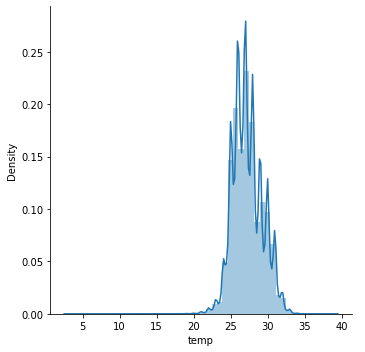

In [ ]:
#distribution plot temperatur
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"temp").add_legend()

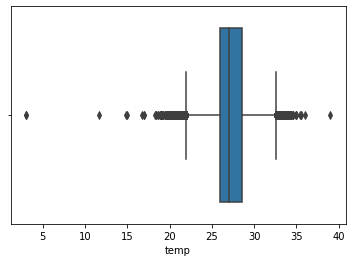

In [ ]:
#Grafik boxplot dari temperatur
sns.boxplot(x="temp", data=dataset2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


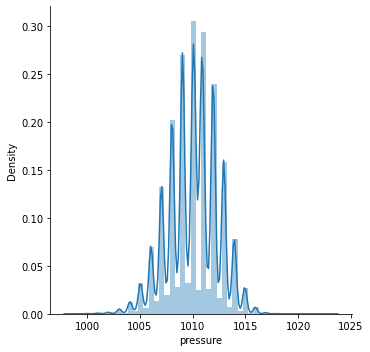

In [ ]:
#distribution plot pressure
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"pressure").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


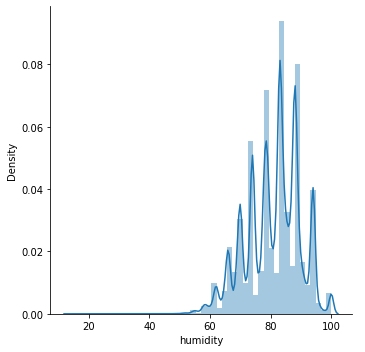

In [ ]:
#distribution plot humidity
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"humidity").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


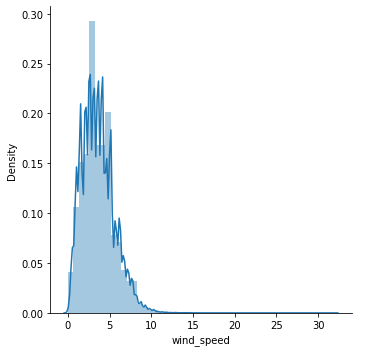

In [ ]:
#distribution plot wind_speed
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"wind_speed").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


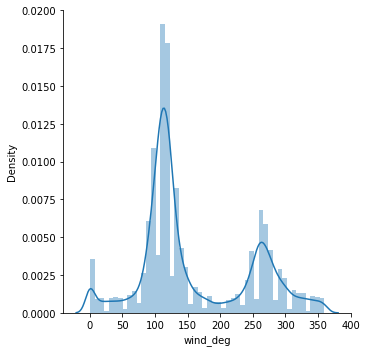

In [ ]:
#distribution plot wind_deg
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"wind_deg").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


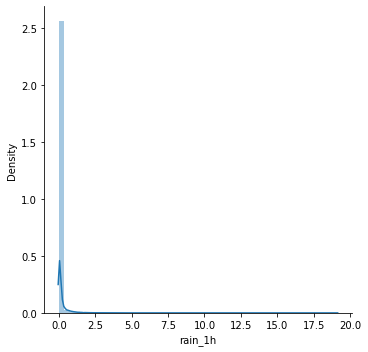

In [ ]:
#distribution plot rain_1h
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"rain_1h").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


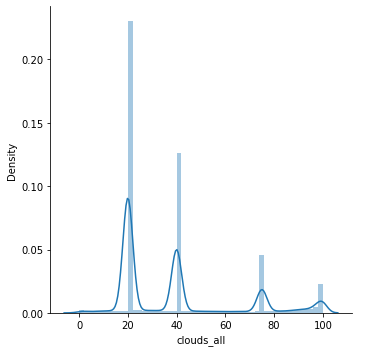

In [ ]:
#distribution plot clouds_all
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"clouds_all").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


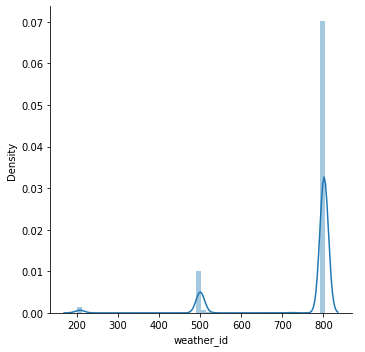

In [ ]:
#distribution plot weather_id
sns.FacetGrid(dataset2,size=5).map(sns.distplot,"weather_id").add_legend()

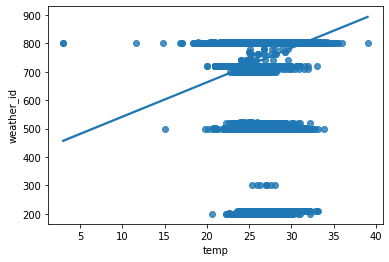

In [ ]:
#Regresi Linear antara temperatur dan weather_id
sns.regplot(x = 'temp', y = 'weather_id', data = dataset2)

In [ ]:
#Fungsi perhitungan korelasi
from scipy.stats import pearsonr
def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Nilai korelasi antara {} dan {} adalah {}".format(column1,column2, pearson_corr))
  print("P-value dari korelasi tersebut adalah {}".format(p_value))

In [ ]:
#Nilai korelasi antara temperatur dan weather
get_correlation('temp','weather_id', dataset2)

Nilai korelasi antara temp dan weather_id adalah 0.1896493793348726
P-value dari korelasi tersebut adalah 0.0


# VISUALISASI DATA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


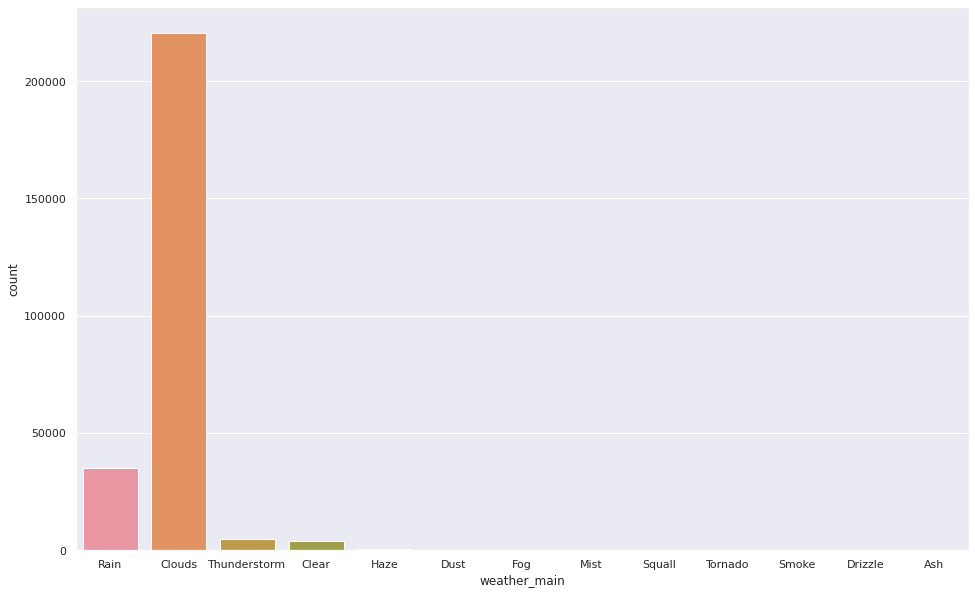

In [ ]:
#Grafik count plot dari weather
sns.set(rc={'figure.figsize': (16, 10)})
sns.countplot(dataset2['weather_main'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


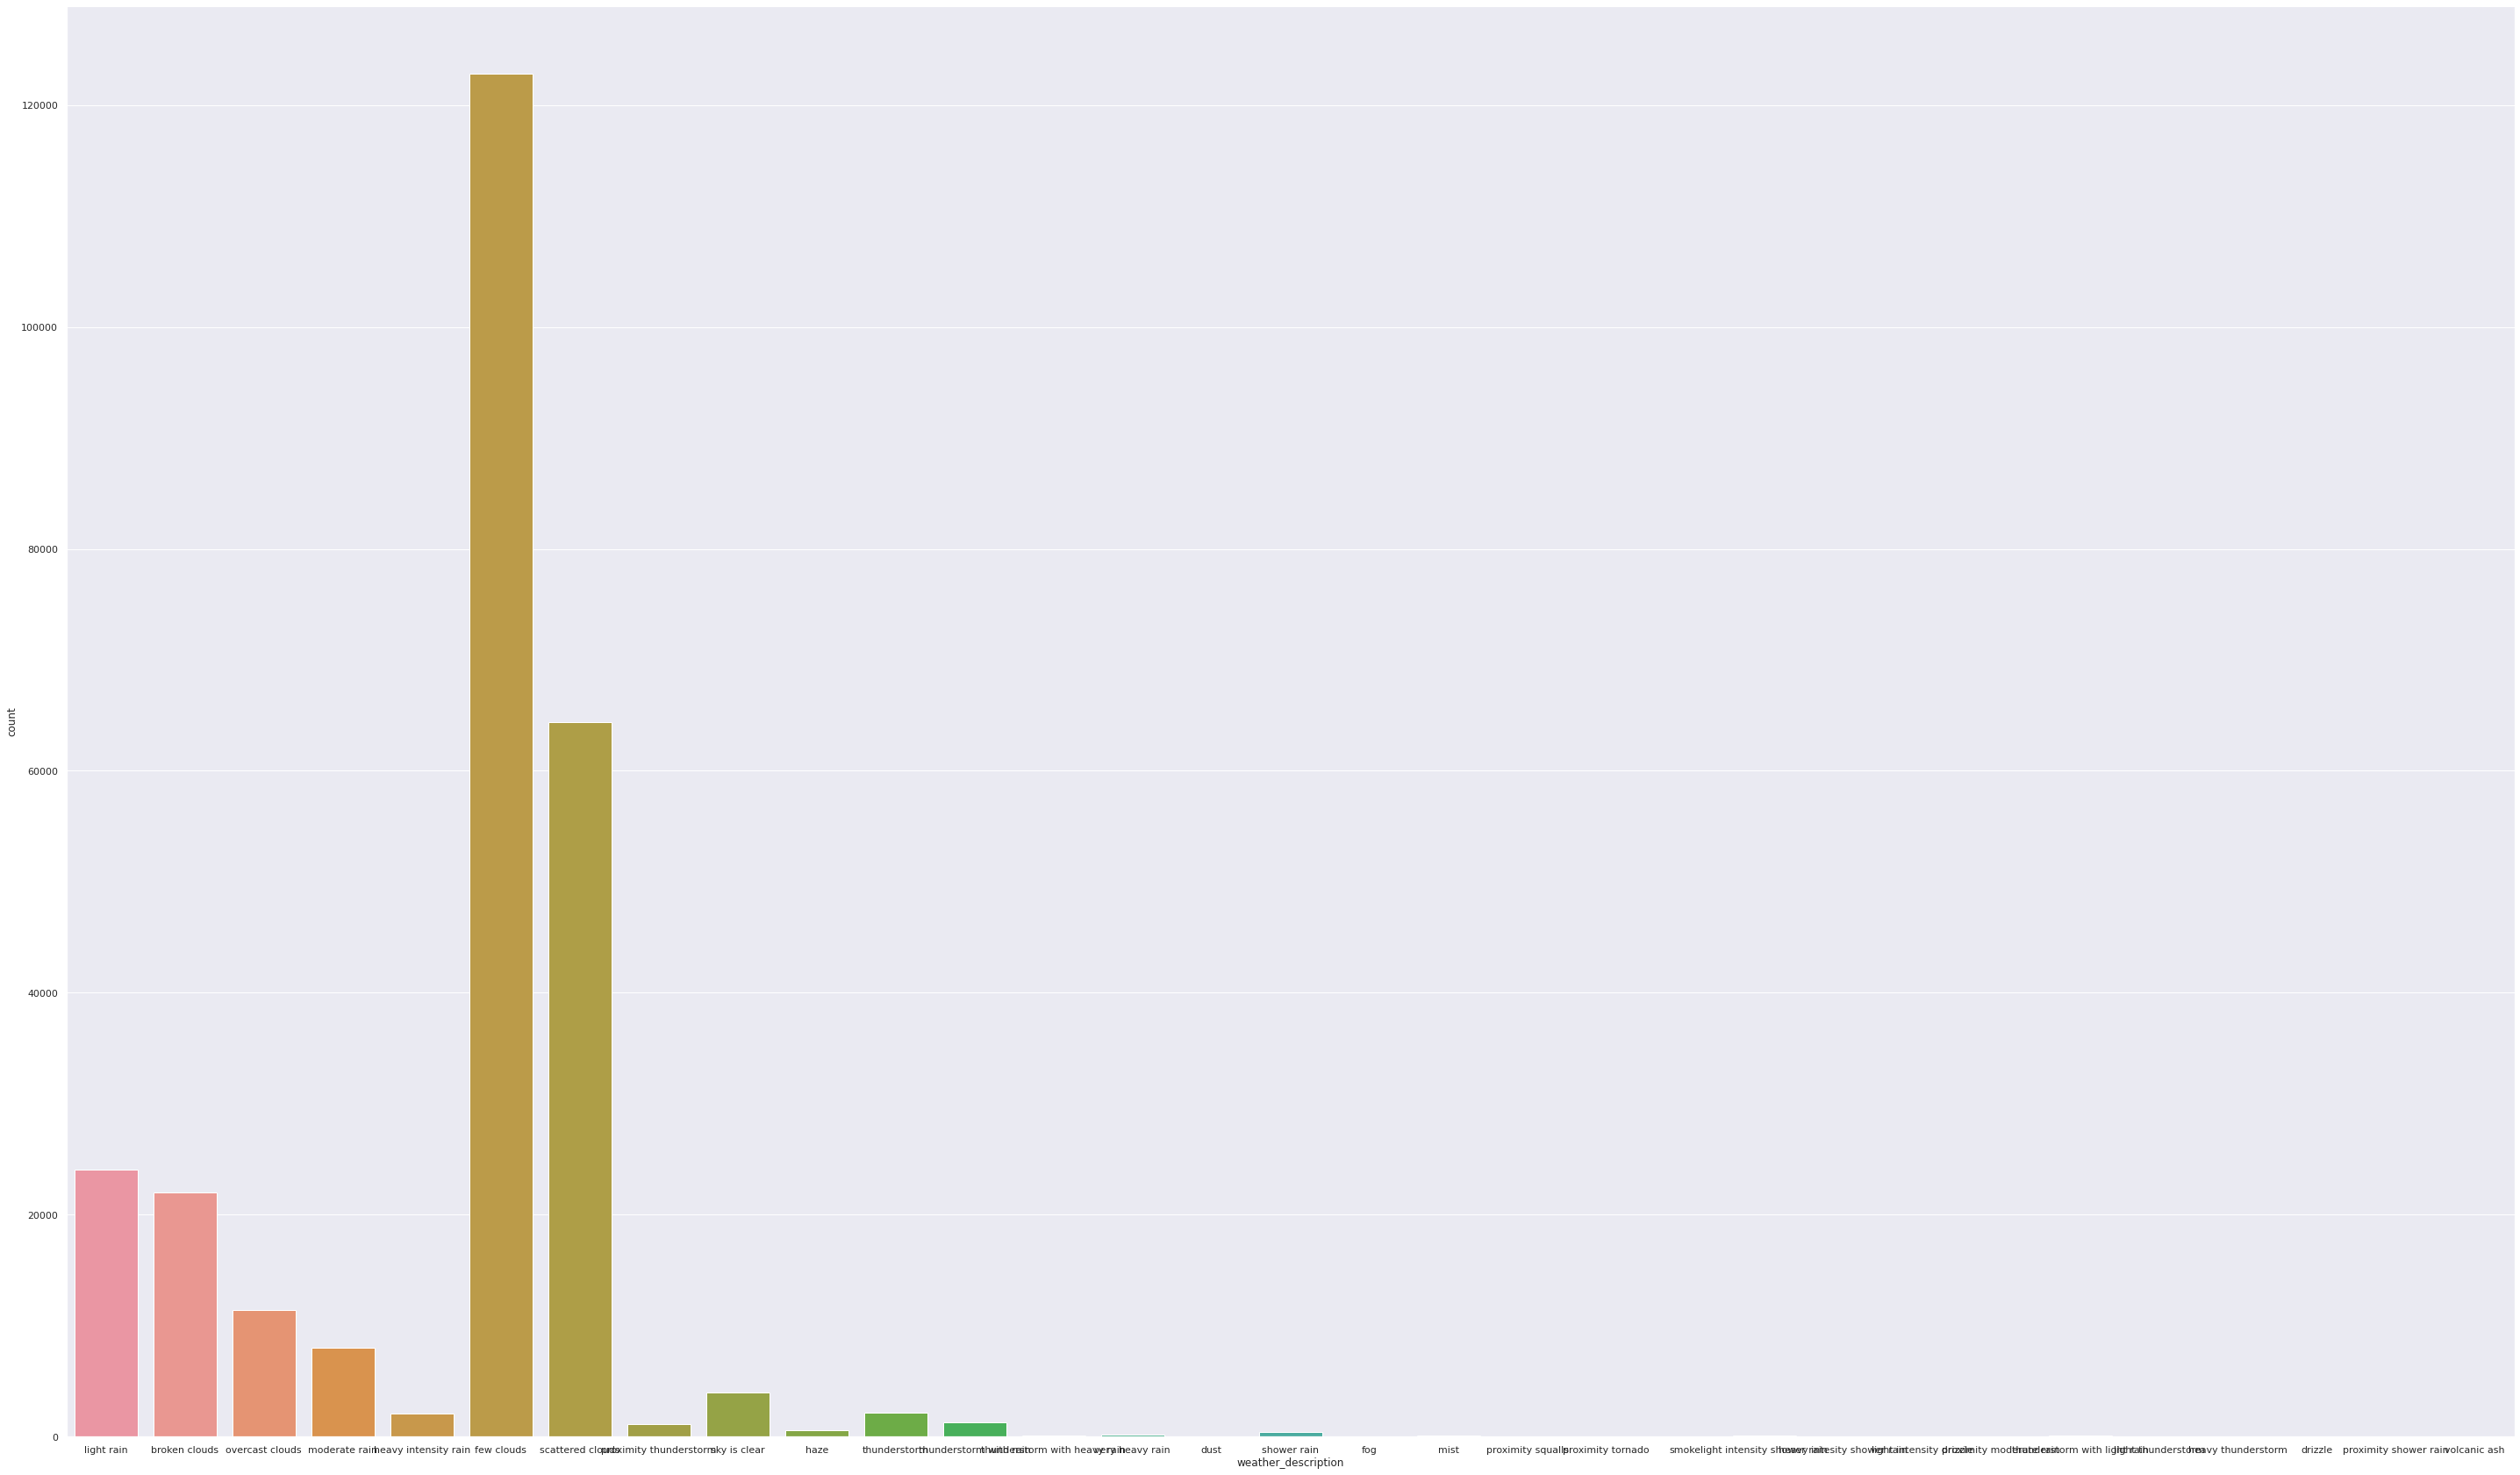

In [ ]:
#Grafik count plot dari weather description
sns.set(rc={'figure.figsize': (50, 30)})
sns.countplot(dataset2['weather_description'])

# PREDIKSI TEMPERATUR CUACA

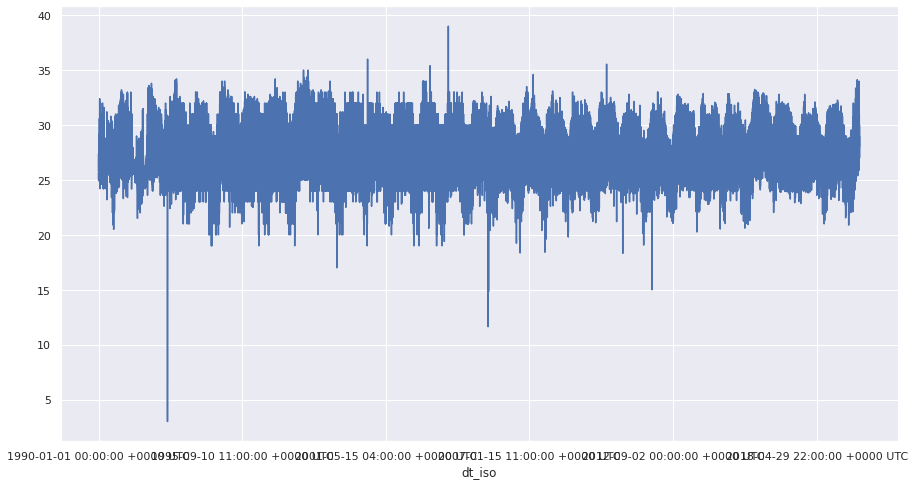

In [ ]:
#Plot time series data temperature
dataset2['temp'].plot(figsize=(15, 8))

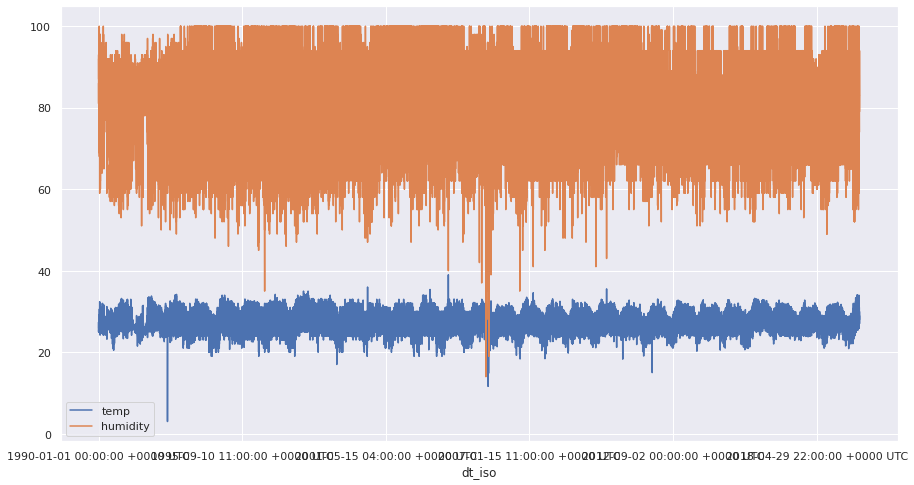

In [ ]:
#Plot time series data temperatur dan humadity
dataset2[['temp','humidity']].plot(figsize=(15, 8))

In [ ]:
#Ditampilkan nilai dari dataset temperature
temperature = dataset2['temp'].values
temperature

array([25.82, 26.2 , 26.45, ..., 28.  , 28.  , 28.  ])

In [ ]:
#Menentukan inputan, diambil dataset 7 hari di awal yang terdiri dari 24 data (24 jam) tiap harinya
window_size =7 * 24     
#Menentukan prediksi kedepan untuk 7 hari ke depan
horizon = 7 * 24   

In [ ]:
#Didefinisikan array kosong untuk variabel x dan y yang diambil dari data temperature
X = []
y = []

#
for i in range(len(temperature) - window_size - horizon + 1):
  input = []
  input.append(temperature[i:i+window_size])

  output = temperature[i + window_size + horizon - 1]
  X.append(input)
  y.append(output)

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(264589, 1, 168)
(264589,)


In [ ]:
train_size = len(X) * 8 // 10

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

211671 52918
211671 52918


In [ ]:
model = models.Sequential([
    layers.LSTM(20, input_shape=X[0].shape),
    layers.Dense(1)
])


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mape', 'mae'])

In [ ]:
y_train

array([27.33, 26.99, 26.92, ..., 24.55, 24.55, 25.08])

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_split=0.2,
    callbacks=[
               keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    ]
)

Epoch 1/100
100/100 [==============================] - 6s 38ms/step - loss: 715.7108 - mape: 98.2731 - mae: 26.6775 - val_loss: 721.6180 - val_mape: 97.9130 - val_mae: 26.7965
Epoch 2/100
100/100 [==============================] - 3s 30ms/step - loss: 705.6373 - mape: 97.5720 - mae: 26.4882 - val_loss: 712.2220 - val_mape: 97.2671 - val_mae: 26.6206
Epoch 3/100
100/100 [==============================] - 3s 29ms/step - loss: 696.3710 - mape: 96.9217 - mae: 26.3127 - val_loss: 702.9283 - val_mape: 96.6241 - val_mae: 26.4455
Epoch 4/100
100/100 [==============================] - 3s 30ms/step - loss: 687.2014 - mape: 96.2743 - mae: 26.1379 - val_loss: 693.7291 - val_mape: 95.9834 - val_mae: 26.2710
Epoch 5/100
100/100 [==============================] - 4s 36ms/step - loss: 678.1235 - mape: 95.6289 - mae: 25.9636 - val_loss: 684.6180 - val_mape: 95.3446 - val_mae: 26.0970
Epoch 6/100
100/100 [==============================] - 3s 29ms/step - loss: 669.1335 - mape: 94.9855 - mae: 25.7899 - va

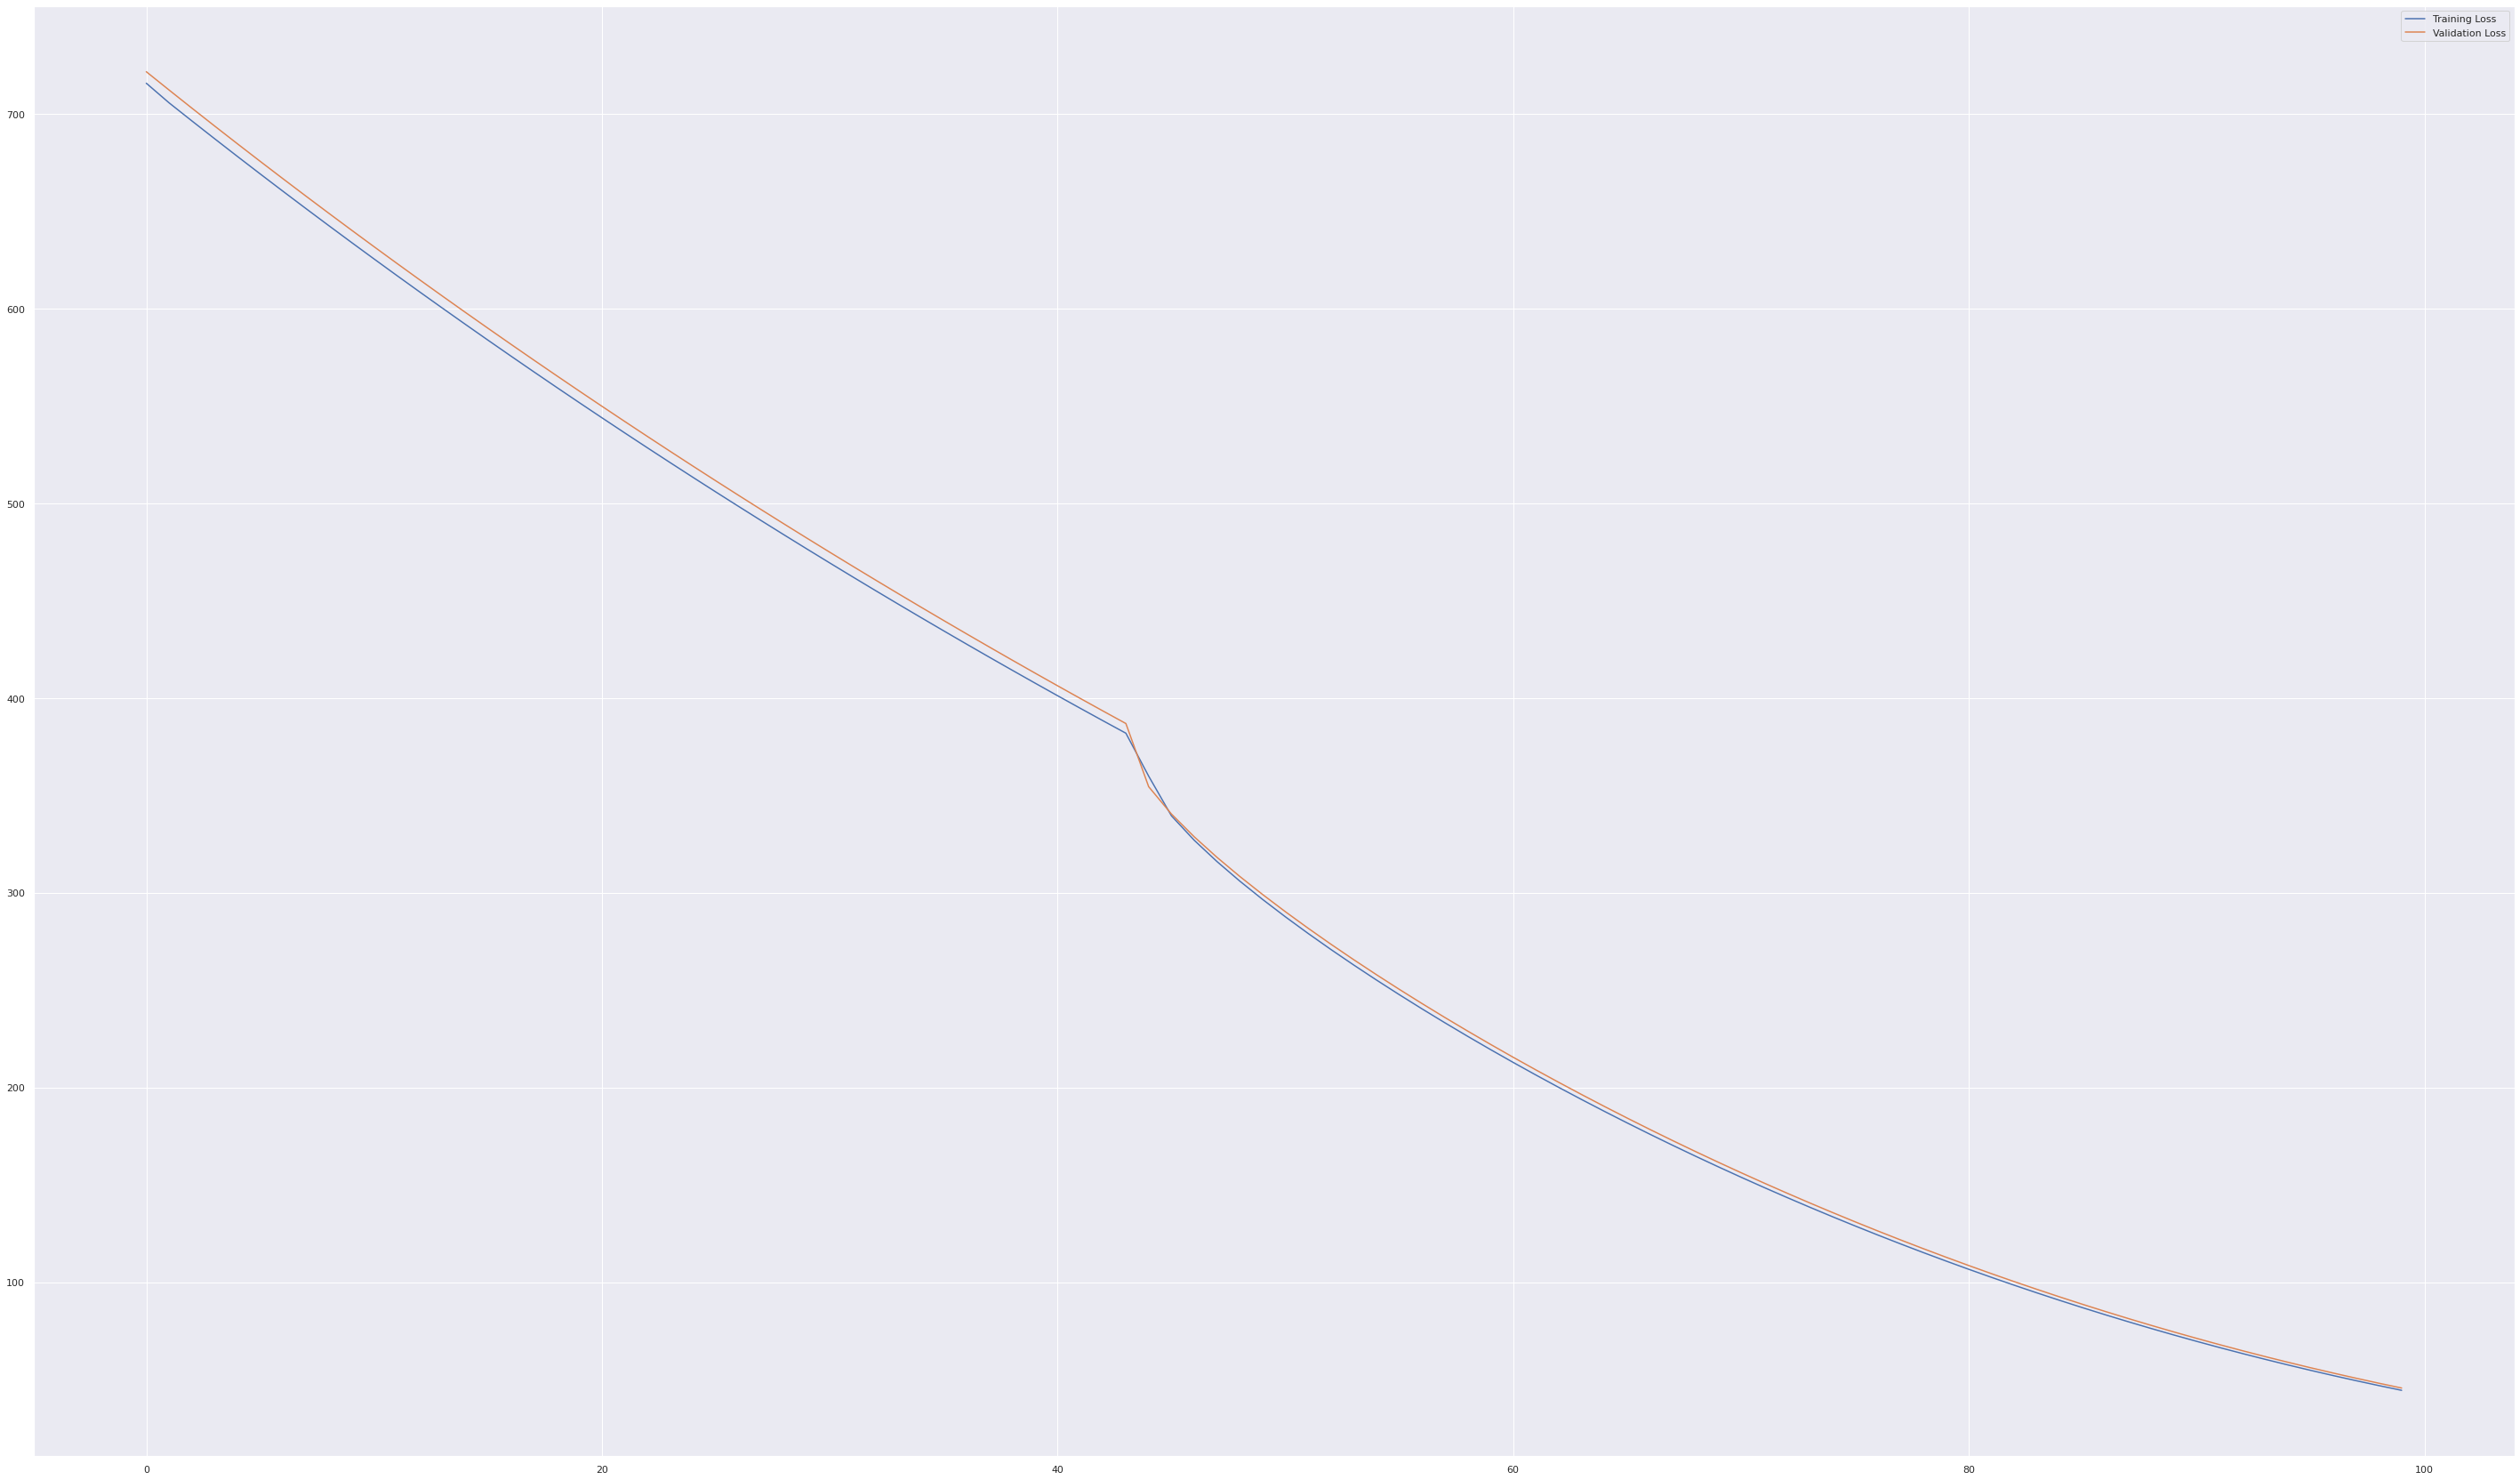

In [ ]:
loss = pd.DataFrame({
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})

loss.plot()

In [ ]:
model.evaluate(X_test, y_test)

1654/1654 [==============================] - 4s 2ms/step - loss: 48.8848 - mape: 24.0773 - mae: 6.7435


[48.884761810302734, 24.077299118041992, 6.743464946746826]

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[20.87408],
       [20.87408],
       [20.87408],
       ...,
       [20.87408],
       [20.87408],
       [20.87408]], dtype=float32)

In [ ]:
testing_result = pd.DataFrame({
    'Actual': y_test,
    'Prediction': y_pred.flatten()
})
testing_result.plot(figsize=(15, 8))

In [ ]:
testing_result.plot(figsize=(15, 8))

NORMALISASI

In [ ]:
temp_min = np.min(temperature)
temp_max = np.max(temperature)

temperature_normalized = (temperature - temp_min) / (temp_max - temp_min)
temperature_normalized

array([0.63388889, 0.64444444, 0.65138889, ..., 0.69444444, 0.69444444,
       0.69444444])

In [ ]:
X2 = []
y2 = []

for i in range(len(temperature_normalized) - window_size - horizon + 1):
  input = []
  input.append(temperature_normalized[i:i+window_size])
  # input.append(humidity_normalized[i:i+window_size])

  output = temperature_normalized[i + window_size + horizon - 1]
  X2.append(input)
  y2.append(output)

X2 = np.array(X2)
y2 = np.array(y2)

print(X2.shape)
print(y2.shape)

(264589, 1, 168)
(264589,)


In [ ]:
train_size = len(X2) * 8 // 10

X2_train = X2[:train_size]
X2_test = X2[train_size:]

y2_train = y2[:train_size]
y2_test = y2[train_size:]

print(len(X2_train), len(X2_test))
print(len(y2_train), len(y2_test))

211671 52918
211671 52918


In [ ]:
model2 = models.Sequential([
    layers.LSTM(20, input_shape=X2[0].shape),
    layers.Dense(1)
])

In [ ]:
model2.compile(optimizer='adam', loss='mse', metrics=['mape', 'mae'])

In [ ]:
history2 = model2.fit(
    X2_train, 
    y2_train, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_split=0.2,
    callbacks=[
               keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    ]
)

Epoch 1/100
100/100 [==============================] - 6s 40ms/step - loss: 0.0078 - mape: 7813.4771 - mae: 0.0603 - val_loss: 0.0021 - val_mape: 5.3870 - val_mae: 0.0364
Epoch 2/100
100/100 [==============================] - 4s 36ms/step - loss: 0.0022 - mape: 7675.8779 - mae: 0.0363 - val_loss: 0.0019 - val_mape: 5.0151 - val_mae: 0.0337
Epoch 3/100
100/100 [==============================] - 4s 35ms/step - loss: 0.0020 - mape: 7643.8926 - mae: 0.0342 - val_loss: 0.0018 - val_mape: 4.8664 - val_mae: 0.0327
Epoch 4/100
100/100 [==============================] - 4s 35ms/step - loss: 0.0019 - mape: 7645.4033 - mae: 0.0334 - val_loss: 0.0018 - val_mape: 4.8170 - val_mae: 0.0324
Epoch 5/100
100/100 [==============================] - 4s 35ms/step - loss: 0.0019 - mape: 7657.1162 - mae: 0.0331 - val_loss: 0.0018 - val_mape: 4.7742 - val_mae: 0.0321
Epoch 6/100
100/100 [==============================] - 4s 36ms/step - loss: 0.0018 - mape: 7633.2012 - mae: 0.0328 - val_loss: 0.0017 - val_mape:

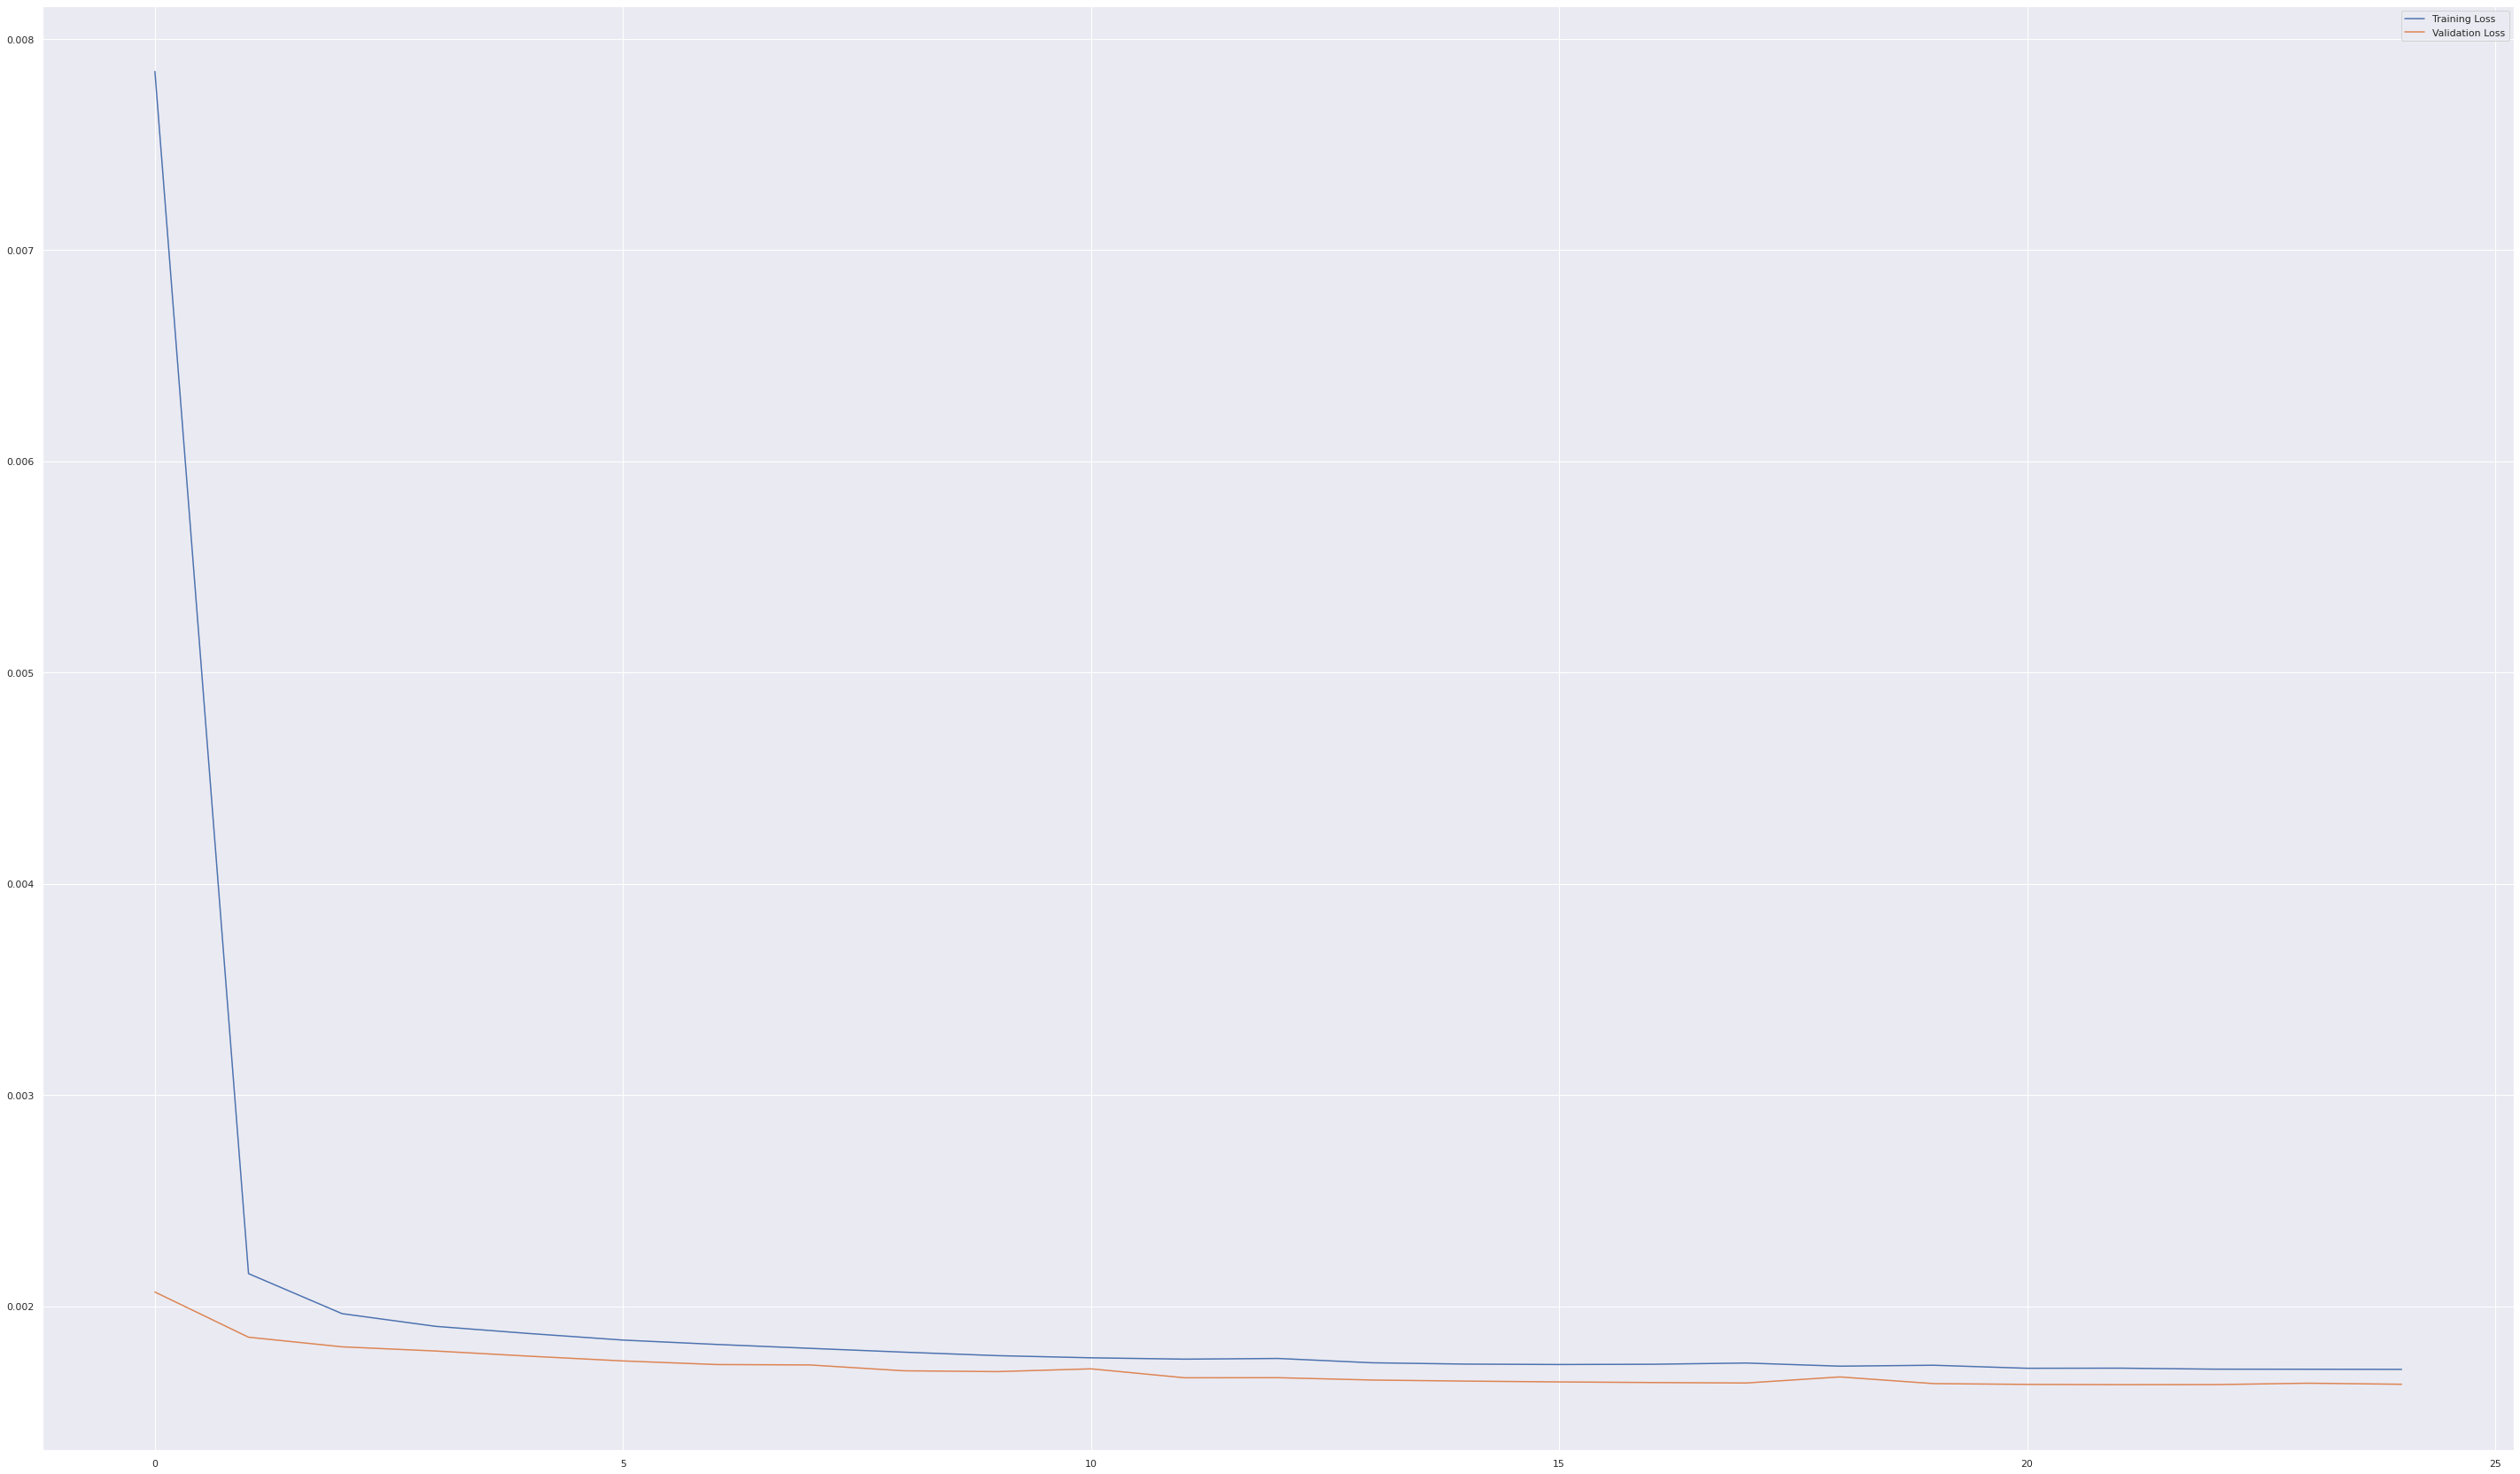

In [ ]:
loss2 = pd.DataFrame({
    'Training Loss': history2.history['loss'],
    'Validation Loss': history2.history['val_loss']
})

loss2.plot()

In [ ]:
model2.evaluate(X2_test, y2_test)

1654/1654 [==============================] - 3s 2ms/step - loss: 0.0013 - mape: 4.0482 - mae: 0.0275


[0.0013214790960773826, 4.0481719970703125, 0.02745012938976288]

In [ ]:
y2_pred = model2.predict(X2_test)
y2_pred

array([[0.6401337 ],
       [0.64148927],
       [0.6495632 ],
       ...,
       [0.69294417],
       [0.6999526 ],
       [0.7052222 ]], dtype=float32)

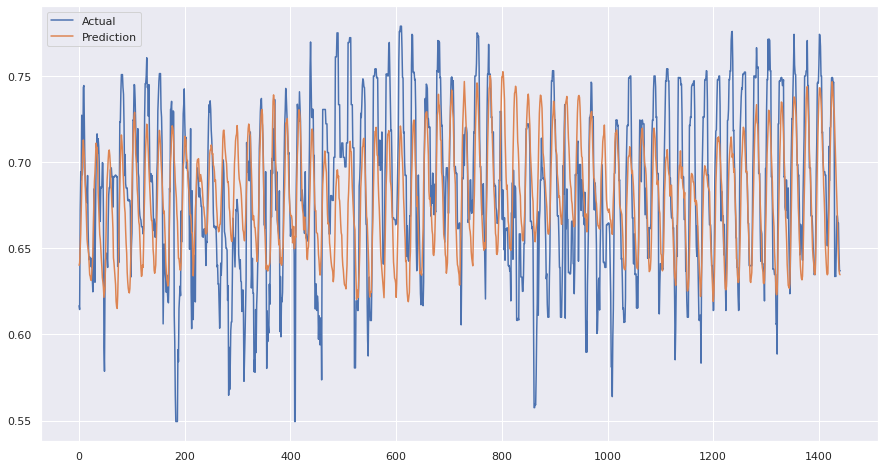

In [ ]:
testing_result2 = pd.DataFrame({
    'Actual': y2_test,
    'Prediction': y2_pred.flatten()
})
testing_result2.loc[:1440].plot(figsize=(15, 8))

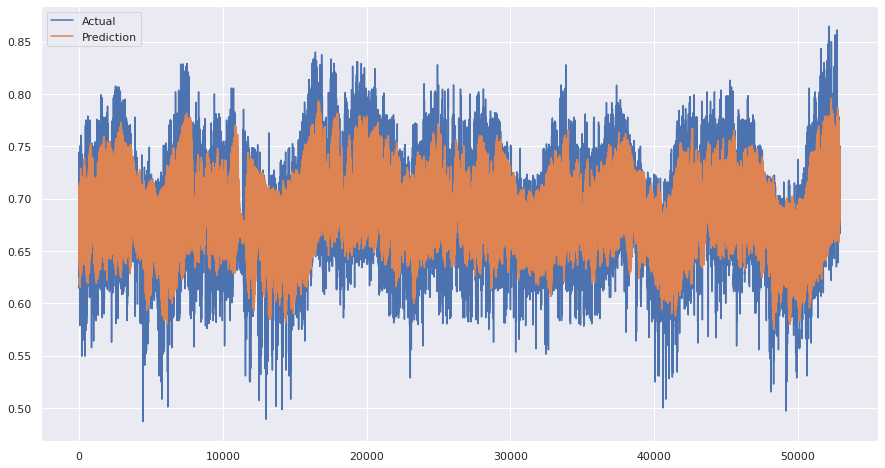

In [ ]:
testing_result2.plot(figsize=(15, 8))

In [ ]:
y2_pred_real = y2_pred.flatten() * (temp_max - temp_min) + temp_min
y2_pred_real

array([26.044813, 26.093613, 26.384275, ..., 27.94599 , 28.198294,
       28.387999], dtype=float32)

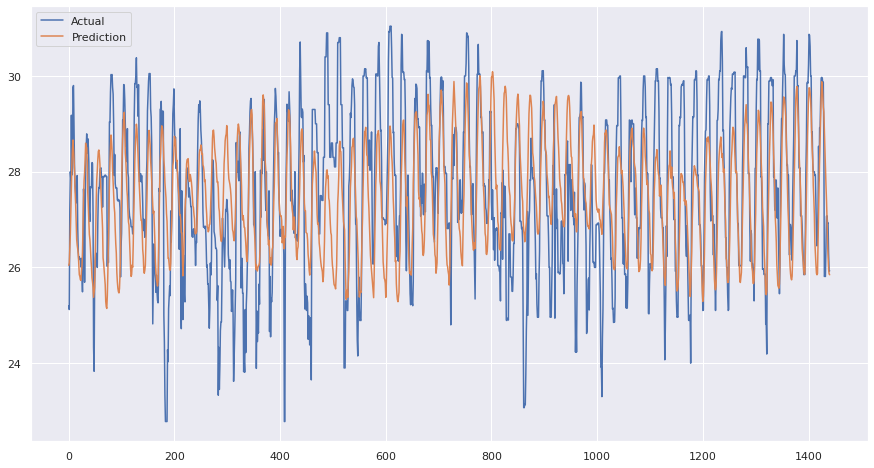

In [ ]:
testing_result2_real = pd.DataFrame({
    'Actual': y_test,
    'Prediction': y2_pred_real
})
testing_result2_real.loc[:1440].plot(figsize=(15, 8))

Text(0.5, 1.0, 'Grafik Prediksi Temperatur Daerah Denpasar, Bali')

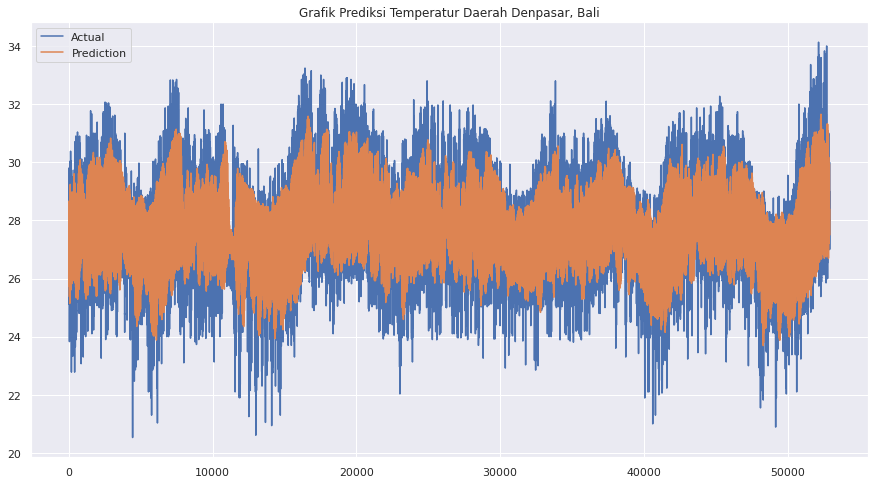

In [ ]:
testing_result2_real.plot(figsize=(15, 8))
plt.title('Grafik Prediksi Temperatur Daerah Denpasar, Bali')

## Nilai Error

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('MSE:', mean_squared_error(y_test, y2_pred_real))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y2_pred_real)))
print('MAE:', mean_absolute_error(y_test, y2_pred_real))
print('MAPE:', mean_absolute_percentage_error(y_test, y2_pred_real))

MSE: 1.7126387313958558
RMSE: 1.30867823829842
MAE: 0.9882048235934735
MAPE: 0.036020214263355874
